**Постановка задачи**  

Вирус Западного Нила чаще всего распространяется на людей через зараженных комаров. У примерно 20% людей, 
которые заражаются вирусом, развиваются симптомы, начиная от постоянной лихорадки до серьезных неврологических заболеваний, 
которые могут привести к смерти.
Учитывая данные о погоде, местоположении, тестировании и распылении, мы должны предсказать, 
когда и где различные виды комаров будут проверять положительный результат на вирус Западного Нила. 
Более точный метод прогнозирования вспышек вируса Западного Нила у комаров поможет городу Чикаго и CPHD более эффективно
выделить ресурсы для предотвращения передачи этого потенциально смертельного вируса.

Каждый год с конца мая до начала октября работники общественного здравоохранения в Чикаго устанавливают ловушки для комаров, 
разбросанные по всему городу. Каждую неделю с понедельника по среду эти ловушки собирают комаров,
а комаров испытывают на наличие вируса Западного Нила до конца недели. 
Результаты испытаний включают количество комаров, видов комаров и присутствует ли вирус Западного Нила в когорте.

В 2002 году в Чикаго были зарегистрированы первые случаи человека вируса Западного Нила. К 2004 году город Чикаго и Чикагский департамент общественного здравоохранения (CDPH) разработали комплексную программу наблюдения и контроля, которая все еще действует сегодня.
Как прогноз поможет CPHD?
Каждую неделю с поздней весны до осени комары в ловушках по всему городу проходят тестирование на вирус. Результаты этих тестов влияют на то, что и где город будет распылять воздушные пестициды для контроля популяций взрослых комаров. Лучший прогноз WNV поможет CPHD повысить осведомленность о возможной вспышке WNV. Это также поможет им оптимизировать расходы.

**train.csv**  
Этот набор данных содержит информацию о ловушках, которые ставятся по всему Чикаго.

**Описание**  
**Id**: идентификатор записи  
**Date**: дата, когда делали тест WNV  
**Address**: приблизительный адрес места ловушки. Это используется для отправки в геокодер.  
**Species**: виды комаров  
**Block**: квартал  
**Street**: название улицы  
**Trap**: идентификатор ловушки  
**AddressNumberAndStreet**: приблизительный адрес, возвращенный геокодером  
**Latitude, Longitude**: широта и долгота возвращенные геокодером  
**AddressAccuracy**: точность возвращенная геокодером  
**NumMosquitos**: количество комаров, пойманных в этой ловушке  
**WnvPresent**: присутствовал ли вирус Западного Нила в этих комарах. 1 означает, что WNV присутствует, а 0 означает, что нет  

**spray.csv**  
Город Чикаго распыляет воздушные пестициды с целью уменьшения популяции комаров.
Этот набор данных содержит данные ГИС по их усилиям по распылению в 2011 и 2013 годах.

**weather.csv**  
Этот набор данных содержит данные о погодных условиях с 2007 по 2014 год доступны в NOAA.  

**Расположение станций**:


**Station 1**: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level  
**Station 2**: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level


**test_truncated**  

Набор данных, для которых нам необходимо построить прогноз

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble, preprocessing

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Прочитаем данные из файлов и выведем общую информацию:

In [2]:
train_df = pd.read_csv("train.csv")
spray_df = pd.read_csv("spray.csv")
weather_df = pd.read_csv("weather.csv")
test_df = pd.read_excel("test_truncated.xlsx")


In [3]:
train_df.head(1)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    8452 non-null   object 
 1   Address                 8452 non-null   object 
 2   Species                 8452 non-null   object 
 3   Block                   8452 non-null   int64  
 4   Street                  8452 non-null   object 
 5   Trap                    8452 non-null   object 
 6   AddressNumberAndStreet  8452 non-null   object 
 7   Latitude                8452 non-null   float64
 8   Longitude               8452 non-null   float64
 9   AddressAccuracy         8452 non-null   int64  
 10  NumMosquitos            8452 non-null   int64  
 11  WnvPresent              8452 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 792.5+ KB


In [5]:
spray_df.head(1)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163


In [6]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [7]:
weather_df.head(1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [9]:
test_df.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX TERRITANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2054 non-null   datetime64[ns]
 1   Address                 2054 non-null   object        
 2   Species                 2054 non-null   object        
 3   Block                   2054 non-null   int64         
 4   Street                  2054 non-null   object        
 5   Trap                    2054 non-null   object        
 6   AddressNumberAndStreet  2054 non-null   object        
 7   Latitude                2054 non-null   float64       
 8   Longitude               2054 non-null   float64       
 9   AddressAccuracy         2054 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 160.6+ KB


Давайте убедимся прежде чем строить прогноз, что наш тестовый набор данных содержит те же виды комаров, что и тренировочный. Иначе мы не сможем построить прогноз.

In [11]:
print('Species присутствуют в test но нет в train: ',[x for x in test_df.Species.unique() if x not in set(train_df.Species.unique())])

Species присутствуют в test но нет в train:  []


Как видим тестовый набор содержит все те же виды комаров, что и тренировочный.

Посчитаем количество зараженных/незараженных комаров

In [12]:
fv = train_df["WnvPresent"].value_counts()
fv

0    7958
1     494
Name: WnvPresent, dtype: int64

Посмотрим количество комаров  и наличие зараженных комаров в ловушках в разрезе типов комаров

In [13]:
train_df.groupby(["Species"]).agg({'NumMosquitos':sum,'WnvPresent':sum}).sort_values(by='WnvPresent',ascending=False)

,NumMosquitos,WnvPresent
Species,,
CULEX PIPIENS,43335,234
CULEX PIPIENS/RESTUANS,55062,220
CULEX RESTUANS,17363,40
CULEX ERRATICUS,7,0
CULEX SALINARIUS,91,0
CULEX TARSALIS,2,0
CULEX TERRITANS,380,0


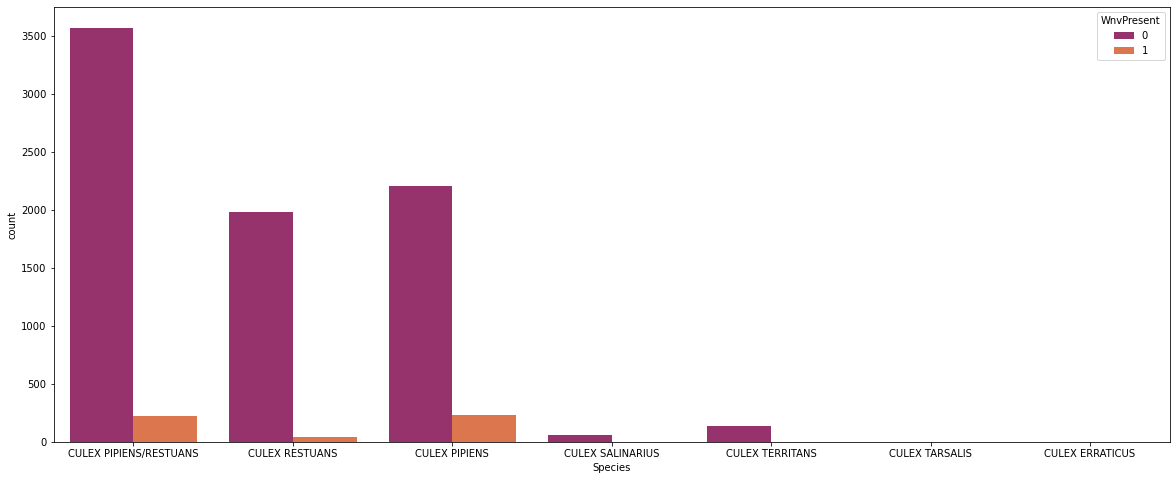

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.countplot(x='Species',data=train_df,hue='WnvPresent', palette=[ '#A7226E','#F26B38'])

Как видим, зараженные комары имеют тип: CULEX PIPIENS, CULEX PIPIENS/RESTUANS, CULEX RESTUANS

Покажем расположение расставленных ловушек на карте

In [15]:
import folium


m = folium.Map(location=[41.8, -87.65])
traps = train_df[['Longitude', 'Latitude']]
locations = traps[['Longitude', 'Latitude']].drop_duplicates()

locations.apply(lambda row:folium.CircleMarker(location=[row['Latitude'],row['Longitude']],
                                        color='green',radius = 4,
                                               fill = True,
                                               fill_color='green'
                                              )
                                             .add_to(m), axis=1)
m


In [16]:
#определим расстояние от ловушек до каждой из станций, найдем минимальное 
#с целью использовать данные о погоде той станции, которая ближе всего находится к ловушке
train_df['nearest_st']=0
import mpu
#первая станция
lat11 = 41.995
lon12 = -87.933
#вторая станция
lat21 = 41.786
lon22 = -87.752

for i in range(len(train_df.index)):
    lat = train_df['Latitude'].values[i]
    lon = train_df['Longitude'].values[i]

    dist1 = mpu.haversine_distance((lat11, lon12), (lat, lon))  
    dist2 = mpu.haversine_distance((lat21, lon22), (lat, lon))

    if dist1==min(dist1,dist2):
        train_df.iloc[i,12]=1
    else:
        train_df.iloc[i,12]=2
#создаем колонку станция+дата для дальнейшего обьединения с weather_df
train_df['nearest_st+data']= train_df['nearest_st'].astype(str)+"_"+ train_df['Date']    

In [17]:
train_df.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,nearest_st,nearest_st+data
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,1_2007-05-29


Повторим те же действия для тестового набора

In [18]:
#определим расстояние от ловушек до каждой из станций, найдем минимальное 
#с целью использовать данные о погоде той станции, которая ближе всего находится к ловушке
test_df['nearest_st']=0

for i in range(len(test_df.index)):
    lat = test_df['Latitude'].values[i]
    lon = test_df['Longitude'].values[i]

    dist1 = mpu.haversine_distance((lat11, lon12), (lat, lon))  
    dist2 = mpu.haversine_distance((lat21, lon22), (lat, lon))

    if dist1==min(dist1,dist2):
        test_df.iloc[i,10]=1
    else:
        test_df.iloc[i,10]=2
#создаем колонку станция+дата для дальнейшего обьединения с weather_df
test_df['nearest_st+data']= test_df['nearest_st'].astype(str)+"_"+ test_df['Date'].astype(str)    

In [19]:
test_df.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,nearest_st,nearest_st+data
0,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX TERRITANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,2,2_2011-06-10


Рассмотрим подробнее датасет о погоде.
В нем присутвуют значения 'M', '-' - это пропущенные значения(missing values)
'T' - небольшое количество осадков,меньше предела измерения 0,01 дюйма.


In [20]:
#удалим колонки с наибольшим количеством пропущенных значений
weather_df=weather_df.drop(['CodeSum', 'Depth','Water1','SnowFall'],axis=1)

In [21]:
#заменим пропущенные значения
weather_df.Tavg = weather_df.Tavg.replace('M', -1)
#Пропущенные значения в Tavg заменим на среднее значение Tmin и Tmax
weather_df.Tavg=weather_df.Tavg.astype(int)
weather_df.Tavg=np.where(weather_df.Tavg==-1,(weather_df.Tmax+weather_df.Tmin)/2,weather_df.Tavg)

weather_df = weather_df.replace('M', np.nan)
weather_df = weather_df.replace('-', np.nan)
weather_df = weather_df.replace('T', 0.005)
weather_df = weather_df.replace(' T', 0.005)
weather_df = weather_df.replace('  T', 0.005)

# Заполним пропущенные значения в столбцах предыдущим ненулевым значение
weather_df.Depart = weather_df.Depart.fillna(method = 'ffill')
weather_df.WetBulb = weather_df.WetBulb.fillna(method = 'ffill')
weather_df.Heat = weather_df.Heat.fillna(method = 'ffill')
weather_df.Cool = weather_df.Cool.fillna(method = 'ffill')
weather_df.Sunrise = weather_df.Sunrise.fillna(method = 'ffill')
weather_df.Sunset = weather_df.Sunset.fillna(method = 'ffill')
weather_df.PrecipTotal = weather_df.PrecipTotal.fillna(method = 'ffill')
weather_df.StnPressure = weather_df.StnPressure.fillna(method = 'ffill')
weather_df.SeaLevel = weather_df.SeaLevel.fillna(method = 'ffill')
weather_df.AvgSpeed = weather_df.AvgSpeed.fillna(method = 'ffill')

In [22]:
# конвертируем строковые типы данных в числовые

to_numeric = ['Tavg', 'Depart', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal',
       'StnPressure', 'SeaLevel',  'AvgSpeed']

for col in to_numeric:
    weather_df[col]= pd.to_numeric(weather_df[col])

In [23]:
weather_df.Sunrise.unique()

array(['0448', '0447', '0446', '0444', '0443', '0442', '0441', '0439',
       '0438', '0437', '0436', '0435', '0434', '0433', '0432', '0431',
       '0430', '0429', '0428', '0427', '0426', '0425', '0424', '0423',
       '0422', '0421', '0420', '0419', '0418', '0417', '0416', '0440',
       '0445', '0449', '0450', '0451', '0452', '0453', '0454', '0455',
       '0456', '0457', '0458', '0459', '0500', '0501', '0502', '0503',
       '0504', '0505', '0506', '0508', '0509', '0510', '0511', '0512',
       '0513', '0514', '0515', '0516', '0517', '0518', '0519', '0520',
       '0521', '0522', '0523', '0524', '0525', '0526', '0527', '0528',
       '0529', '0530', '0531', '0532', '0533', '0535', '0536', '0537',
       '0538', '0539', '0540', '0541', '0542', '0543', '0544', '0545',
       '0546', '0547', '0548', '0549', '0550', '0552', '0553', '0554',
       '0555', '0556', '0557', '0558', '0559', '0600', '0602', '0603',
       '0604', '0605', '0606', '0607', '0608', '0610', '0611', '0612',
      

In [24]:
weather_df.Sunset.unique()

array(['1849', '1850', '1851', '1852', '1853', '1855', '1856', '1857',
       '1858', '1859', '1860', '1901', '1902', '1903', '1904', '1905',
       '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913',
       '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921',
       '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929',
       '1930', '1931', '1900', '1854', '1848', '1846', '1845', '1843',
       '1842', '1840', '1839', '1837', '1835', '1834', '1832', '1831',
       '1829', '1827', '1826', '1824', '1822', '1821', '1819', '1817',
       '1815', '1814', '1812', '1810', '1809', '1807', '1805', '1803',
       '1760', '1758', '1756', '1755', '1753', '1751', '1749', '1748',
       '1746', '1744', '1742', '1741', '1739', '1737', '1735', '1734',
       '1732', '1730', '1729', '1727', '1725', '1724', '1722', '1720',
       '1719', '1717', '1715', '1714', '1712', '1711', '1709', '1707',
       '1706', '1704', '1703', '1701', '1660', '1658', '1657', '1656',
      

In [25]:
#заменим несуществующее время на ближайшее верное
weather_df.Sunset=np.where(weather_df.Sunset=='1860',1900,weather_df.Sunset)
weather_df.Sunset=np.where(weather_df.Sunset=='1760',1800,weather_df.Sunset)
weather_df.Sunset=np.where(weather_df.Sunset=='1660',1700,weather_df.Sunset)

In [26]:
#переведем колонки Sunrise и Sunset в формат времени
weather_df.Sunrise = pd.to_datetime(weather_df.Sunrise,format = '%H%M')
weather_df.Sunset = pd.to_datetime(weather_df.Sunset,format = '%H%M')


In [27]:
weather_df.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14,51,56,0,2,1900-01-01 04:48:00,1900-01-01 18:49:00,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14,51,57,0,3,1900-01-01 04:48:00,1900-01-01 18:49:00,0.0,29.18,29.82,2.7,25,9.6


In [28]:
#посчитаем длительность дня
weather_df['DayLength'] = ((weather_df.Sunset - weather_df.Sunrise).astype('timedelta64[m]')/60).values

In [29]:
#создаем колонку станция+дата для дальнейшего обьединения с train_df
weather_df['nearest_st+data']= weather_df['Station'].astype(str)+"_"+ weather_df['Date'] 
weather_df=weather_df.drop(['Date'],axis=1)

In [30]:
#обьединяем train_df  и weather_d по колонке 'nearest_st+data'
train_df = train_df.merge(weather_df, on = 'nearest_st+data')
train_df=train_df.drop(['nearest_st+data','Station'],axis=1)
train_df.head(1)
            

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,nearest_st,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DayLength
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,88,60,74.0,10,58,65,0,9,1900-01-01 04:21:00,1900-01-01 19:17:00,0.0,29.39,30.11,5.8,18,6.5,14.933333


In [31]:
#обьединяем test_df  и weather_d по колонке 'nearest_st+data'
test_df = test_df.merge(weather_df, on = 'nearest_st+data')
test_df=test_df.drop(['nearest_st+data','Station'],axis=1)
test_df.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,nearest_st,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DayLength
0,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX TERRITANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,2,71,51,61.0,-7,56,58,4,0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.44,29.26,29.92,6.1,1,7.5,15.166667


In [32]:
#Добавляем колонки месяц, дата, год в train_df
train_df.Date=pd.to_datetime(train_df.Date)
train_df['month'] = train_df.Date.dt.month
train_df['day'] = train_df.Date.dt.day
train_df['year'] = train_df.Date.dt.year
train_df.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,nearest_st,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DayLength,month,day,year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,88,60,74.0,10,58,65,0,9,1900-01-01 04:21:00,1900-01-01 19:17:00,0.0,29.39,30.11,5.8,18,6.5,14.933333,5,29,2007


In [33]:
#Добавляем колонки месяц, дата, год в test_df
test_df['month'] = test_df.Date.dt.month
test_df['day'] = test_df.Date.dt.day
test_df['year'] = test_df.Date.dt.year
test_df.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,nearest_st,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DayLength,month,day,year
0,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX TERRITANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,2,71,51,61.0,-7,56,58,4,0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.44,29.26,29.92,6.1,1,7.5,15.166667,6,10,2011


Постороим карту тепловую карту корреляций, чтобы понять какие переменные можно не включать в модель

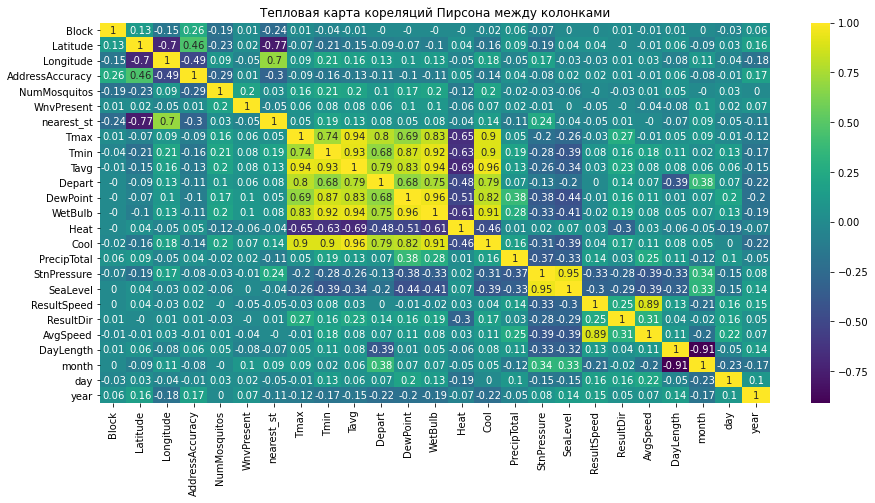

In [34]:
fig, axes = plt.subplots(figsize=(15,7))
sns.heatmap(train_df.corr().round(2), annot=True, cmap='viridis')
plt.title("Тепловая карта кореляций Пирсона между колонками")
plt.show()


In [35]:
#удалим текстовые колонки в train_df
train_df = train_df.drop(['Address', 'AddressNumberAndStreet','Block','Trap','Street','Date','Sunrise','Sunset',
                          'nearest_st','AddressAccuracy','StnPressure','ResultDir'], axis = 1)
#удалим колонки, которые имеют высокую корреляцию с Tavg
train_df = train_df.drop(['SeaLevel','Tmax','Tmin','Cool','Depart','Heat'], axis = 1)

In [36]:
#удалим текстовые колонки в test_df
test_df = test_df.drop(['Address', 'AddressNumberAndStreet','Block','Trap','Street','Date','Sunrise','Sunset',
                        'nearest_st','AddressAccuracy','StnPressure','ResultDir'], axis = 1)
test_df = test_df.drop(['SeaLevel','Tmax','Tmin','Cool','Depart','Heat'], axis = 1)

In [37]:
# для train_df разобьем колонку 'Species' на 3 вида, в зависимости от количества случаев зараженных комаров, что присутствуют в каждом виде
train_df.Species=np.where((train_df.Species=='CULEX PIPIENS')|(train_df.Species=='CULEX PIPIENS/RESTUANS'),"high", 
                          np.where(train_df.Species=='CULEX RESTUANS',"medium","slow"))
#переведем категориальную переменную 'Species' в числовую
train_df=pd.get_dummies(data=train_df,columns=['Species'])

train_df.head(2)


,Latitude,Longitude,NumMosquitos,WnvPresent,Tavg,DewPoint,WetBulb,PrecipTotal,ResultSpeed,AvgSpeed,DayLength,month,day,year,Species_high,Species_medium,Species_slow
0,41.95469,-87.800991,1,0,74.0,58,65,0.0,5.8,6.5,14.933333,5,29,2007,1,0,0
1,41.95469,-87.800991,1,0,74.0,58,65,0.0,5.8,6.5,14.933333,5,29,2007,0,1,0


In [38]:
#для test_df разобьем колонку 'Species' на 3 вида, в зависимости от количества случаев зараженных комаров, что присутствуют в каждом виде
test_df.Species=np.where((test_df.Species=='CULEX PIPIENS')|(test_df.Species=='CULEX PIPIENS/RESTUANS'),"high", 
                         np.where(test_df.Species=='CULEX RESTUANS',"medium","slow"))
#переведем категориальную переменную 'Species' в числовую
test_df=pd.get_dummies(data=test_df,columns=['Species'])

test_df.head(2)

,Latitude,Longitude,Tavg,DewPoint,WetBulb,PrecipTotal,ResultSpeed,AvgSpeed,DayLength,month,day,year,Species_high,Species_medium,Species_slow
0,41.896282,-87.655232,61.0,56,58,0.44,6.1,7.5,15.166667,6,10,2011,0,0,1
1,41.720848,-87.666014,61.0,56,58,0.44,6.1,7.5,15.166667,6,10,2011,1,0,0


Посмотрим данные за какие года присутсвуют в spray_df

In [39]:
spray_df.Date = pd.to_datetime(spray_df.Date)
spray_df['year']=spray_df.Date.dt.year
spray_df.year.unique()

array([2011, 2013], dtype=int64)

In [40]:
train_df.year.unique()

array([2007, 2009, 2013], dtype=int64)

In [41]:
test_df.year.unique()

array([2011], dtype=int64)

Так как у нас есть данные о распылении пестицидов только за 2011 и 2013 год, а тренировочный набор данных содержит информацию о содержимом ловушек для комаров за 3 года, то мы не можем использовать эти данные для обучения нашей модели.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline

X=train_df.drop(['NumMosquitos','WnvPresent'],axis=1)
y=train_df['WnvPresent']


In [53]:
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(SVC())
    models.append(GaussianNB())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(BaggingClassifier())
    
    
    return models

models = get_models()

In [54]:
kf = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42  )


In [55]:
for model in models:

    # ініціалізуємо порожні списки, в яких зберігатимемо значення помилки на кожному фолді
    train_res, test_res = [], []
        
    # отримаємо індекси навчального та тестового набору
    for train_idx, test_idx in kf.split(X, y):

        # виберемо поточну навчальну та тестову групи
        X_train, y_train = X.loc[train_idx], y[train_idx]
        X_test, y_test = X.loc[test_idx], y[test_idx]
        
        
        clf = make_pipeline(StandardScaler(), model).fit(X_train,y_train)

        # виберемо прогнози
        y_train_preds = clf.predict(X_train)
        y_test_preds = clf.predict(X_test)
        
        # порахуємо помилки та збережемо у відповідні списки
        train_res.append(np.round(metrics.roc_auc_score(y_train, y_train_preds,average='macro', multi_class='ovr'), 2))
        test_res.append(np.round(metrics.roc_auc_score(y_test, y_test_preds,average='macro', multi_class='ovr'), 2))
        

    print('Середня точність на навчальних наборах: ', np.mean(train_res).round(4), "модель:",model)
    print('Середня точність на тестових наборах: ', np.mean(test_res).round(4),"модель:",model)
    
    print("\n")

Середня точність на навчальних наборах:  0.5 модель: LogisticRegression()
Середня точність на тестових наборах:  0.5 модель: LogisticRegression()


Середня точність на навчальних наборах:  0.5 модель: SVC()
Середня точність на тестових наборах:  0.5 модель: SVC()


Середня точність на навчальних наборах:  0.618 модель: GaussianNB()
Середня точність на тестових наборах:  0.62 модель: GaussianNB()


Середня точність на навчальних наборах:  0.598 модель: KNeighborsClassifier()
Середня точність на тестових наборах:  0.56 модель: KNeighborsClassifier()


Середня точність на навчальних наборах:  0.714 модель: DecisionTreeClassifier()
Середня точність на тестових наборах:  0.574 модель: DecisionTreeClassifier()


Середня точність на навчальних наборах:  0.744 модель: BaggingClassifier()
Середня точність на тестових наборах:  0.582 модель: BaggingClassifier()




Как видим, наилучшую точность на тренировочном и тестовом наборе показывает модель GaussianNB() - 0.62.


Подберем наилучшие гиперпараметры для улучшения качества нашей модели GaussianNB()

In [56]:
X_train=train_df.drop(['NumMosquitos','WnvPresent'],axis=1)
y_train=train_df['WnvPresent']

X_test=test_df

In [57]:
from sklearn.model_selection import GridSearchCV

svm = GaussianNB()  # ініціалізація моделі

# ініціалізація значень параметрів, для яких здійснити пошук (будуть протестовані всі комбінації значень)
params_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# ініціалізація об'єкта для пошуку оптимальних значень параметрів
clf = GridSearchCV(
    estimator=svm,  # модель, яку потрібно протестувати
    param_grid=params_grid,  # словник з іменами параметрів та списком їх значень
    scoring='f1_macro',  # назва метрики якості, яку необхідно використовувати
    cv=4  # кількість тестових наборів
)

clf = clf.fit(X_train,y_train)  # пошук значень
grid_search_results = pd.DataFrame(clf.cv_results_)  # отримання результатів пошуку у вигляді таблиці
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005263,1.028874e-03,0.003159,5.544977e-04,1.0,{'var_smoothing': 1.0},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
1,0.003120,2.125417e-04,0.002772,4.422416e-04,0.811131,{'var_smoothing': 0.8111308307896871},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
2,0.002995,1.283079e-05,0.002008,5.582191e-06,0.657933,{'var_smoothing': 0.657933224657568},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
3,0.003266,4.358216e-04,0.002243,4.302653e-04,0.53367,{'var_smoothing': 0.533669923120631},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
4,0.003637,4.189148e-04,0.002267,2.696548e-04,0.432876,{'var_smoothing': 0.43287612810830584},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
5,0.003499,1.920602e-05,0.002390,2.229178e-04,0.351119,{'var_smoothing': 0.3511191734215131},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
6,0.003272,2.396137e-04,0.002377,2.176846e-04,0.284804,{'var_smoothing': 0.2848035868435802},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
7,0.003263,2.510824e-04,0.002371,2.089919e-04,0.231013,{'var_smoothing': 0.23101297000831597},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
8,0.003513,1.689032e-06,0.002380,2.113786e-04,0.187382,{'var_smoothing': 0.1873817422860384},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8
9,0.003388,2.161127e-04,0.002133,2.145296e-04,0.151991,{'var_smoothing': 0.15199110829529336},0.485011,0.485011,0.484885,0.484885,0.484948,0.000063,8


Построим заново нашу модель с учетом полученных гиперпараметров.

In [58]:
# ініціалізуємо порожні списки, в яких зберігатимемо значення помилки на кожному фолді
train_res, test_res = [], []
        
# отримаємо індекси навчального та тестового набору
for train_idx, test_idx in kf.split(X, y):

     # виберемо поточну навчальну та тестову групи
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]
        
        
    clf = make_pipeline(StandardScaler(), GaussianNB(var_smoothing=0.002848035868435802)).fit(X_train,y_train)

    # виберемо прогнози
    y_train_preds = clf.predict(X_train)
    y_test_preds = clf.predict(X_test)
        
    # порахуємо помилки та збережемо у відповідні списки
    train_res.append(np.round(metrics.roc_auc_score(y_train, y_train_preds,average='macro', multi_class='ovr'), 2))
    test_res.append(np.round(metrics.roc_auc_score(y_test, y_test_preds,average='macro', multi_class='ovr'), 2))
        

print('Середня точність на навчальних наборах: ', np.mean(train_res).round(4), "модель:GaussianNB")
print('Середня точність на тестових наборах: ', np.mean(test_res).round(4),"модель:GaussianNB")
    
   

Середня точність на навчальних наборах:  0.716 модель:GaussianNB
Середня точність на тестових наборах:  0.718 модель:GaussianNB


Как видим подбор гиперпараметров значительно улучшил качество нашей модели.

Применим эту модель для данных test_df и построим прогноз.

In [59]:
X_train=train_df.drop(['NumMosquitos','WnvPresent'],axis=1)
y_train=train_df['WnvPresent']

X_test=test_df
clf = make_pipeline(StandardScaler(), GaussianNB(var_smoothing=0.002848035868435802)).fit(X_train,y_train)

In [60]:
y_test_pred=clf.predict(X_test)


In [61]:
test_df = pd.read_excel("test_truncated.xlsx")

In [62]:
test_df['forecast']=y_test_pred

In [63]:
test_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,forecast
0,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX TERRITANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,0
1,2011-06-10,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,0
2,2011-06-10,"7500 North Oakley Avenue, Chicago, IL 60645, USA",CULEX RESTUANS,75,N OAKLEY AVE,T148,"7500 N OAKLEY AVE, Chicago, IL",42.017430,-87.687769,8,0
3,2011-06-10,"5800 North Western Avenue, Chicago, IL 60659, USA",CULEX PIPIENS/RESTUANS,58,N WESTERN AVE,T028,"5800 N WESTERN AVE, Chicago, IL",41.986921,-87.689778,9,0
4,2011-06-10,"5000 South Central Avenue, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,50,S CENTRAL AVE,T031,"5000 S CENTRAL AVE, Chicago, IL",41.801498,-87.763416,9,0
